In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

History of MNIST data set:

MNIST(Modified National institute of Standards and Technology) is a large data contains 70,000(60,000 training images and 10,000 testing images) grayscale images of digits 0 to 9. Set taken from American census bureau employees(Training data set) and American High School(Test data set) normalized into a 28X28 pixel which introduced grayscale level.

Source: https://en.wikipedia.org/wiki/MNIST_database


In [2]:
data=pd.read_csv('MNIST_train.csv')

In [3]:
data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_train= data.to_numpy()

In [5]:
y_train = mnist_train[:,2]
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

In [6]:
print(set(y_train))

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


In [7]:
X_train = mnist_train[:,3:]
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784))

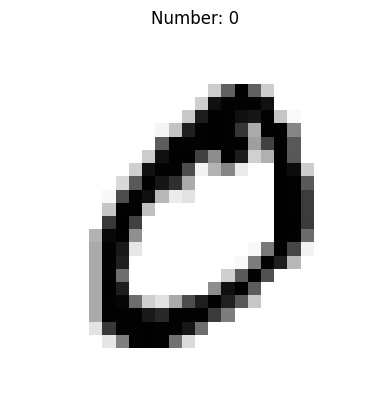

In [8]:
plt.imshow(X_train[1].reshape(28,28),cmap='grey_r')
plt.axis('off')
plt.title('Number: '+str(y_train[1]))
plt.show()

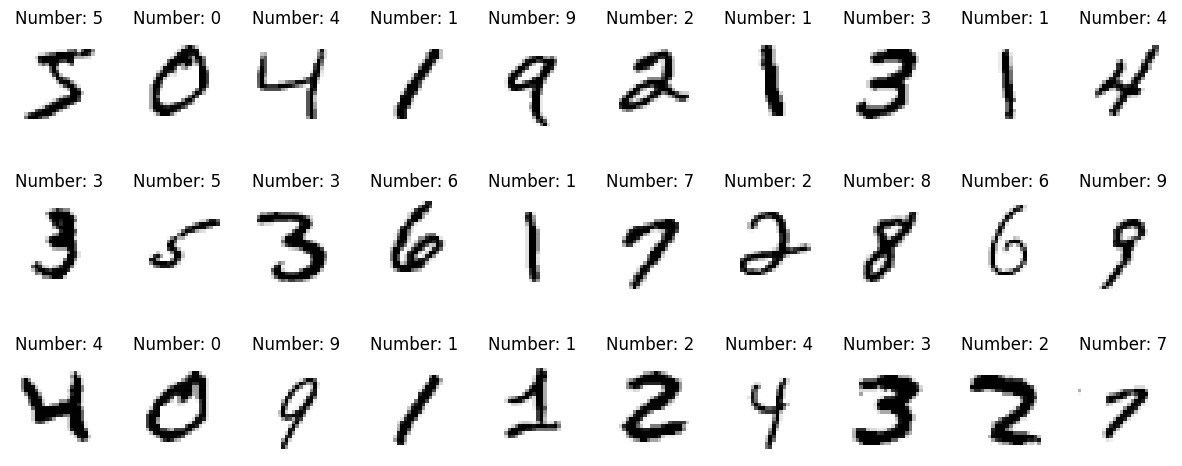

In [9]:
plt.figure(figsize=(15,6))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray_r')
    plt.title(f'Number: {y_train[i]}')
    plt.axis('off')
plt.show()


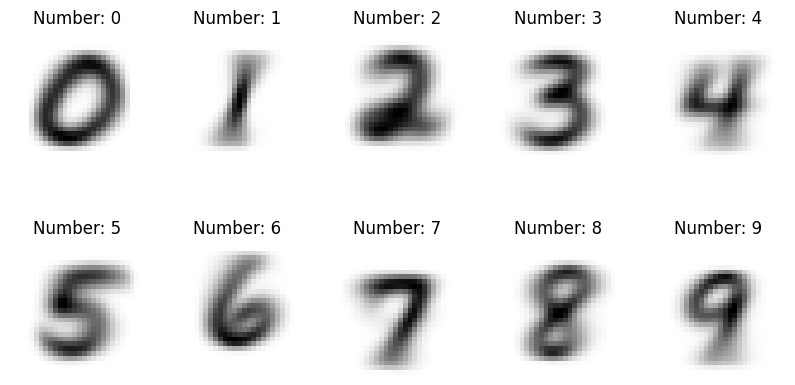

In [10]:
plt.figure(figsize=(10,5))
for k in range(10):
    plt.subplot(2,5,k+1)
    plt.imshow(np.mean(X_train[y_train==k], axis=0).reshape(28,28), cmap='grey_r')
    plt.title('Number: '+str(k))
    plt.axis('off')
plt.show()


Observations:
 When we see the record individually, some time it is hard to identify the number as it depends on the individual hand writing.

 The mean shows the clear difference of the numbers. Each number has their characters preserved.


# Applying EDA to the input data

In [11]:
print(X_train.max())
print(X_train.min())

255
0


In [12]:
# Clearly we can see the data in the X_train is varying between 255 and 0.
# Let us use min-max scaler (x-x_min)/(x_max-x_min) => (x-0)/(255-0) ==> x/255
X_train = X_train/255
print(X_train.max())
print(X_train.min())

1.0
0.0


# Navie Bayes Classifier

In [13]:
from scipy.stats import multivariate_normal as mvn

In [14]:
class GaussNB():
  def fit(self,X,y,epsilon=1e-3):
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))

    for k in self.K:
      x_k =X[y==k]
      self.likelihoods[k]={"mean":x_k.mean(axis=0),"cov":x_k.var(axis=0)+epsilon}
      self.priors[k]=len(x_k)/len(X)
  def predict(self,X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))
    for k, l in self.likelihoods.items():
        P_hat[:,k]=mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [15]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [16]:
gnb=GaussNB()

In [17]:
gnb.fit(X_train,y_train)

In [18]:
y_hat_navie = gnb.predict(X_train)

In [19]:
accuracy_navie = accuracy(y_train,y_hat_navie)
accuracy_navie

np.float64(0.7682333333333333)

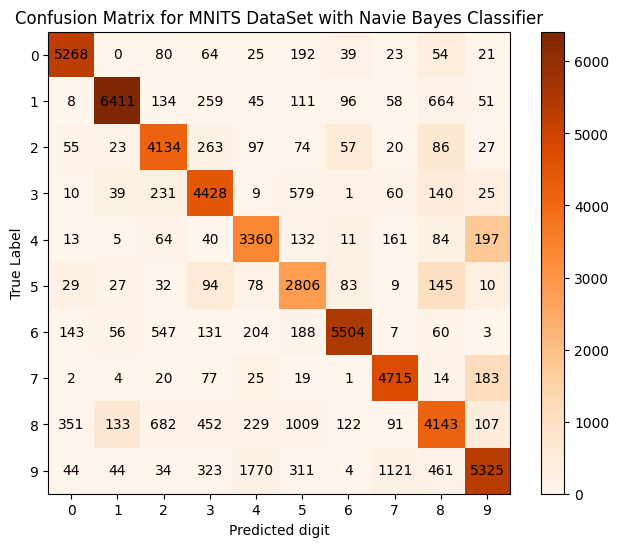

In [20]:
# Confusin Matrix
def Confusin_Matrix(y_train,y_hat,name = None):
    total_digits = 10

    cm= np.zeros((total_digits,total_digits),dtype='int64')
    for true,pred in zip(y_train,y_hat):
        cm[true,pred]= cm[true,pred]+1

    plt.figure(figsize=(8,6))
    plt.imshow(cm,cmap='Oranges')
    plt.title('Confusion Matrix for MNITS DataSet with ' + name )
    plt.xlabel('Predicted digit')
    plt.ylabel('True Label')


    for i in range(total_digits):
        for j in range(total_digits):
            plt.text(i,j,str(cm[i,j]),color='black',ha='center', va='center')

    plt.xticks(range(total_digits), range(total_digits))
    plt.yticks(range(total_digits), range(total_digits))
    plt.colorbar()
    plt.show()
    return cm

cm_navie = Confusin_Matrix(y_train,y_hat_navie,'Navie Bayes Classifier')

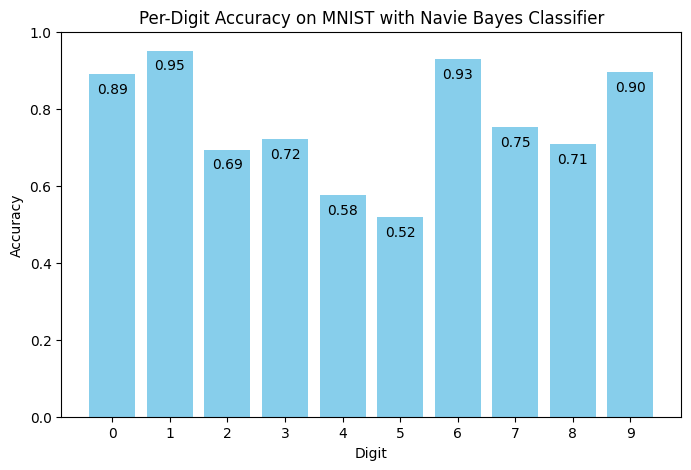

In [21]:
def accuracy_per_digit(cm, name):
    per_class_acc = cm.diagonal() / cm.sum(axis=1)
    plt.figure(figsize=(8,5))
    bars =plt.bar(range(10), per_class_acc, color='skyblue')
    plt.xticks(range(10))
    plt.ylim(0,1)
    plt.xlabel('Digit')
    plt.ylabel('Accuracy')
    plt.title('Per-Digit Accuracy on MNIST with '+ name)

    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
                 f'{per_class_acc[i]:.2f}', ha='center', color='black', fontsize=10)

    plt.show()
    return per_class_acc

per_class_acc_navie=accuracy_per_digit(cm_navie, 'Navie Bayes Classifier')



# Observations:
The digit 0 is identified correctly with an accuracy of 0.89. In very few cases it was read as 8 or 6  
The digit 1 is identified correctly with an accuracy of 0.95. In very few cases it was read as 8   
The digit 2 is identified correctly with an accuracy of 0.62. In very few cases it was read as 8 or 6 or 3   
The digit 3 is identified correctly with an accuracy of 0.72. In very few cases it was read as 8 or 9 or 2 or 1    
The digit 4 is identified correctly with an accuracy of 0.58. In very few cases it was read as 9    
The digit 5 is identified correctly with an accuracy of 0.52. In very few cases it was read as 8 or 3 or 9    
The digit 6 is identified correctly with an accuracy of 0.93. In very few cases it was read as 8     
The digit 7 is identified correctly with an accuracy of 0.75. In very few cases it was read as 9 or 4    
The digit 8 is identified correctly with an accuracy of 0.71. In very few cases it was read as 9 or 1  
The digit 9 is identified correctly with an accuracy of 0.90. In very few cases it was read as 7 or 4  


# Non-navie Bayes classifier(Gaussian)

In [22]:
class GaussBayes():

  def fit(self, X, y, epslion=1e-3):
    self.likelihoods=dict()
    self.priors={}
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)
      self.likelihoods[k]={'mean':mu_k,
                          'cov':(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epslion*np.identity(D)    }
      self.priors[k]=len(X_k)/len(X)

  def predict(self,X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))
    for k, l in self.likelihoods.items():
        P_hat[:,k]=mvn.logpdf(X,l['mean'],l['cov'])+np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [23]:
gbays = GaussBayes()

In [24]:
gbays.fit(X_train,y_train)

In [25]:
y_hat_gbays = gbays.predict(X_train)

In [51]:
accuracy_gbays=accuracy(y_train,y_hat_gbays)
accuracy_gbays

np.float64(0.9306333333333333)

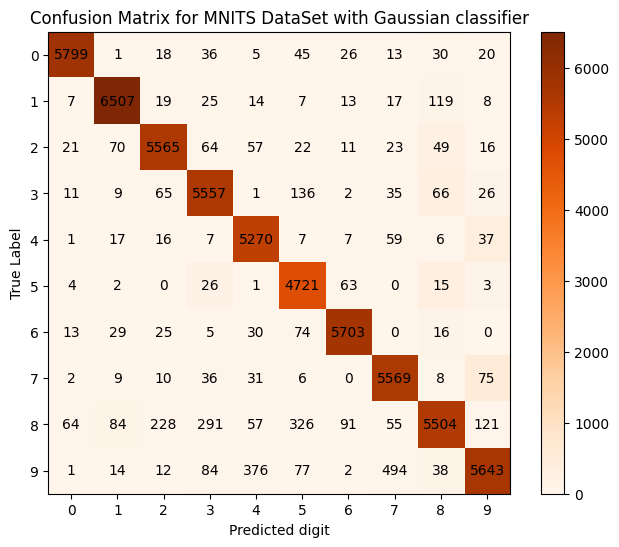

In [27]:
cm_Gaussian = Confusin_Matrix(y_train,y_hat_gbays,'Gaussian classifier')


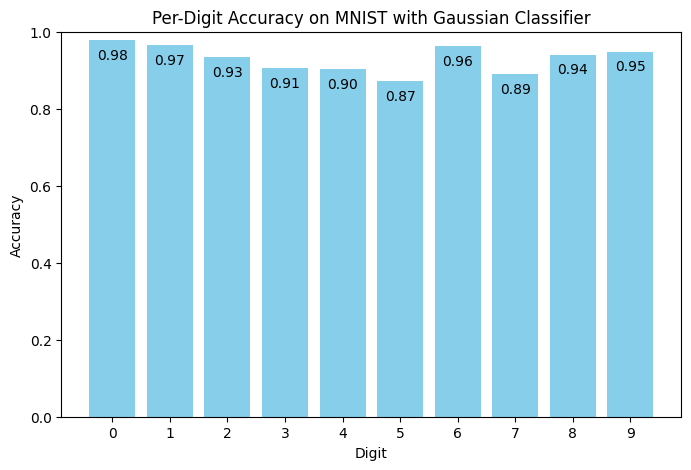

In [28]:
per_class_acc_Gaussian=accuracy_per_digit(cm_Gaussian, 'Gaussian Classifier')

# Observations 

The accuracy of reading the digits has increased for almost all the digits

# K Nearest Neighbours

In [29]:
from typing import Self
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self,X, K, epsilion=1e-3):
    N = len(X)
    y_hat =np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilion))
      y_hat[i]=np.bincount(self.y[idxt],weights=gamma_k).argmax()
    return y_hat



In [30]:
mnist_test = pd.read_csv('MNIST_test.csv')

In [31]:
mnist_test_np= mnist_test.to_numpy()
y_test = mnist_test_np[:,2]
y_test
X_test = mnist_test_np[:,3:]
X_test[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253,
       253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  1

In [32]:
y_test.shape

(10000,)

In [33]:
X_test=X_test/255

In [34]:
knn_instance = KNNClassifier()
knn_instance.fit(X_train,y_train)

In [35]:
X_test.shape

(10000, 784)

In [36]:
random_choice=np.random.choice(10000,size=4000,replace=False)
X_test_new=X_test[random_choice]
y_test_new=y_test[random_choice]

In [37]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [38]:
y_hat_knn=knn_instance.predict(X_test_new,21)

In [39]:
accuracy_k=accuracy(y_test_new,y_hat_knn)

In [40]:
accuracy_k

np.float64(0.96325)

In [43]:
y_test_new

array([4, 1, 8, ..., 1, 1, 2], shape=(4000,))

In [46]:
a = np.array([1.0,2.0])
a.astype('int64')

array([1, 2])

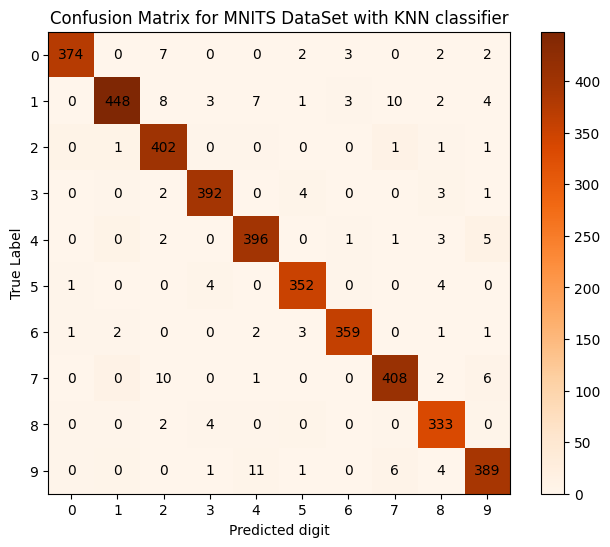

In [47]:
cm_knn = Confusin_Matrix(y_test_new,y_hat_knn.astype('int64'),'KNN classifier')


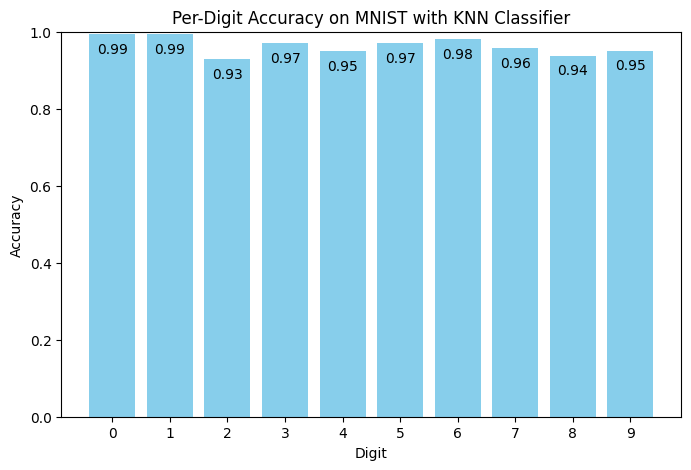

In [48]:
per_class_acc_knn=accuracy_per_digit(cm_knn, 'KNN Classifier')

In [38]:
y_hat_knn=[]
accuracy_knn = []
for K in range(3,15,2):
    knn_var=knn_instance.predict(X_test_new,K)
    y_hat_knn.append(knn_var)
    accuracy_k=accuracy(y_test_new,knn_var)
    accuracy_knn.append(accuracy_k)
    print(accuracy_k)
    

0.97275
0.97025
0.97025
0.9675
0.96875
0.96775


In [42]:
print(accuracy_knn)


[np.float64(0.97275), np.float64(0.97025), np.float64(0.97025), np.float64(0.9675), np.float64(0.96875), np.float64(0.96775)]


In [49]:
per_class_acc_knn

array([0.99468085, 0.99334812, 0.92840647, 0.97029703, 0.94964029,
       0.96969697, 0.98087432, 0.95774648, 0.93802817, 0.95110024])

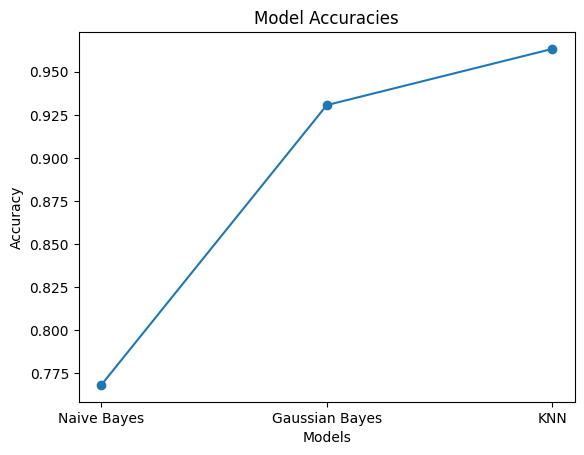

In [ ]:
models = ["Naive Bayes", "Gaussian Bayes", "KNN"]
accuracies = [accuracy_navie, accuracy_gbays, accuracy_k]
plt.scatter(models, accuracies)
plt.plot(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.show()

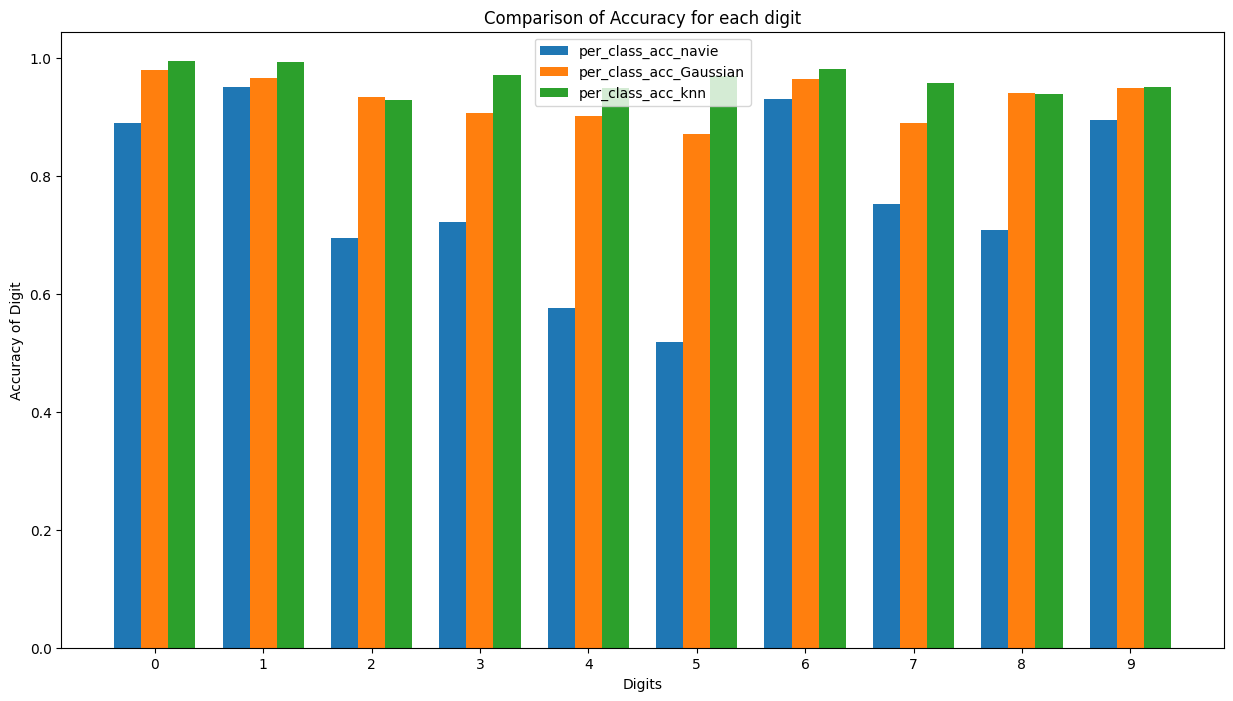

In [68]:
data = np.array([
    per_class_acc_navie,       
    per_class_acc_Gaussian,      
    per_class_acc_knn        
])

rows, cols = data.shape
plt.figure(figsize=(15,8))

x = np.arange(cols)  # index positions

bar_width = 0.25

plt.bar(x - bar_width, data[0], width=bar_width, label='per_class_acc_navie')
plt.bar(x,             data[1], width=bar_width, label='per_class_acc_Gaussian')
plt.bar(x + bar_width, data[2], width=bar_width, label='per_class_acc_knn')

plt.xlabel("Digits")
plt.ylabel("Accuracy of Digit")
plt.title("Comparison of Accuracy for each digit")
plt.xticks(x)  
plt.legend()
plt.show()



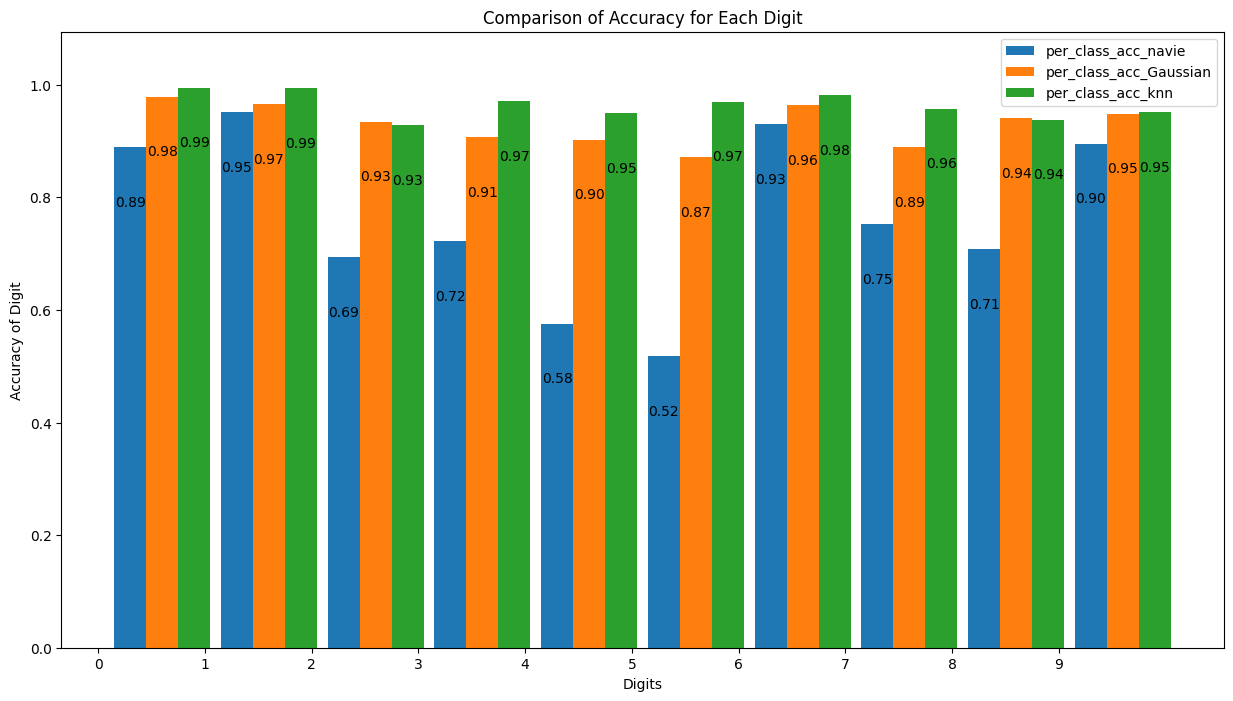

In [75]:

data = np.array([
    per_class_acc_navie,       
    per_class_acc_Gaussian,      
    per_class_acc_knn        
])

rows, cols = data.shape
plt.figure(figsize=(15,8))

x = np.arange(cols)  # index positions
bar_width = 0.3

bars1 = plt.bar(x + bar_width, data[0], width=bar_width, label='per_class_acc_navie')
bars2 = plt.bar(x+ 2*bar_width,data[1], width=bar_width, label='per_class_acc_Gaussian')
bars3 = plt.bar(x + 3*bar_width, data[2], width=bar_width, label='per_class_acc_knn')

# Add value text above bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height - 0.11, 
            f"{height:.2f}",   # format to 2 decimals if needed
            ha='center', 
            va='bottom'
        )

plt.xlabel("Digits")
plt.ylabel("Accuracy of Digit")
plt.title("Comparison of Accuracy for Each Digit")
plt.xticks(x)
plt.ylim(0, 1.1 * np.max(data))  # ensures text doesn't overlap top
plt.legend()
plt.show()
